In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def resize_grayscale_image(image_array, target_size=(150, 150)):
    image_tensor = tf.expand_dims(tf.convert_to_tensor(image_array, dtype=tf.float32), axis=0)
    image_tensor = tf.expand_dims(image_tensor, axis=-1)

    resized_image = tf.image.resize(image_tensor, target_size)

    resized_image_array = tf.squeeze(resized_image).numpy()

    return resized_image_array

In [3]:
image = cv2.imread('./ecoli.jpg', cv2.IMREAD_GRAYSCALE)
image.shape

(134, 150)

In [4]:
image = np.array(resize_grayscale_image(image))
image.shape

(150, 150)

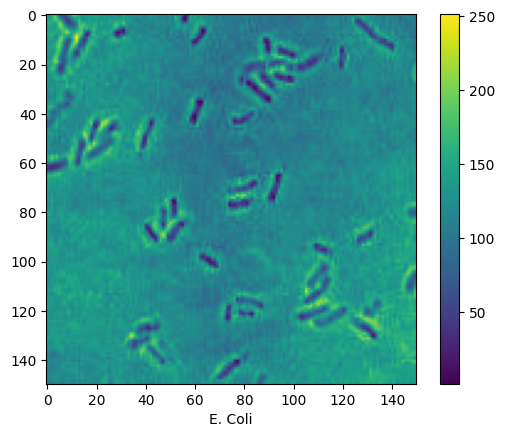

In [5]:
plt.figure()
plt.imshow(image)
plt.colorbar()
plt.xlabel('E. Coli')
plt.grid(False)
plt.show()

In [6]:
if image.ndim == 2:
    image = np.expand_dims(image, axis=-1)

image = np.expand_dims(image, axis=0)
image.shape

(1, 150, 150, 1)

Predictions: [2.61253463e-05, 0.855571389, 0.000379650592, 5.11654319e-09, 0.144022867]
Predicted class: E.Coli
Predicted score: 0.855571389


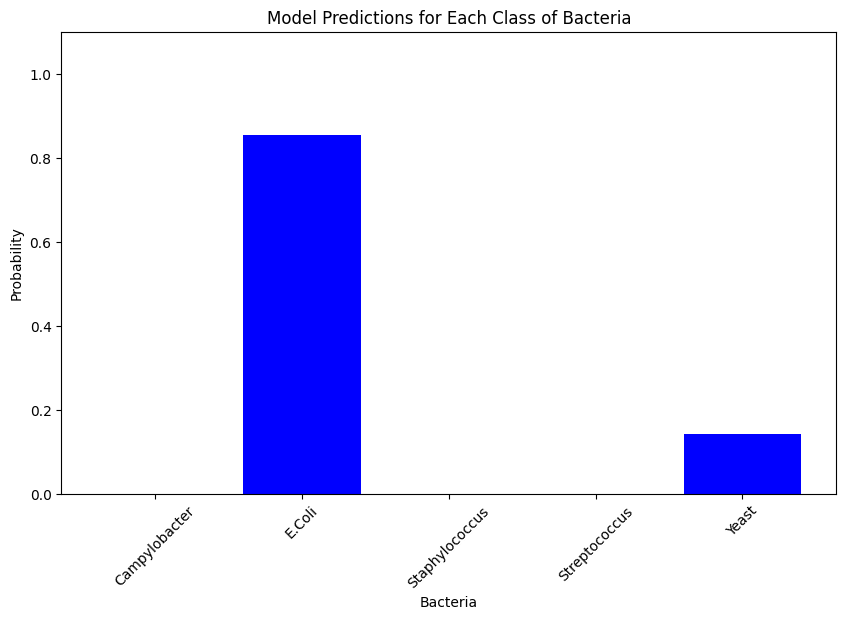

In [7]:
import requests
import json

url = 'http://172.210.99.32:8501/v1/models/visualbacter:predict'

data = {
    'instances': image.tolist(),
}

headers = {
    'Content-Type': 'application/json',
}

response = requests.post(url, data=json.dumps(data), headers=headers)

if response.status_code == 200:
    CLASS_NAMES = ['Campylobacter', 'E.Coli', 'Staphylococcus', 'Streptococcus', 'Yeast']
    predictions = response.json()['predictions'][0]
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = CLASS_NAMES[predicted_class_index]
    predicted_class_score = predictions[predicted_class_index]
    print('Predictions:', predictions)
    print('Predicted class:', predicted_class_name)
    print('Predicted score:', predicted_class_score)

    plt.figure(figsize=(10, 6))
    plt.bar(CLASS_NAMES, predictions, color='blue')
    plt.xlabel('Bacteria')
    plt.ylabel('Probability')
    plt.title('Model Predictions for Each Class of Bacteria')
    plt.ylim(0, 1.1)
    plt.xticks(rotation=45)

    plt.show()

else:
    print('Error:', response.status_code, response.text)